# 第十二课笔记—— 时间序列


![image](https://user-images.githubusercontent.com/26344632/41084923-0a7e1fbe-6a68-11e8-9567-dc67b4ea501e.png)

# 平稳性

假定时间序列${𝑌 𝑡:𝑡 = 0,±1,±2,……}$ 的每一个数值都是从一个概率分布中随机得到，如果满足下列条件： 

 - $均值𝐸 𝑌 𝑡 = 𝜇与时间t无关的常数$；
 
 - $方差𝑉𝑎𝑟 𝑌 𝑡 = 𝛾$与时间t 无关的常数$；
 
 - $协方差𝐶𝑜𝑣 𝑌 𝑡,𝑌 𝑡+𝑘 = 𝛾0,𝑘 只与时期间隔 k 有关，与时间t 无关的常数$。 

则称该随机时间序列是平稳的（stationary) 

### 验证方法

 - 图检验
     - 时序图检验、自相关图检验
     - 操作简单、应用广泛
     - 带有主观性
     
     从一个模型的图上观察，如果一个模型是呈趋势性（增长或下降）的、或者有周期性的(有规律的），则这不是一个平稳的模型。因为这说明Y的均值、方差和协方差与时间t是有关联的，不是随机的。
平稳模型的自相关系数随着时间t的增长而趋于零。

 - 假设检验：构造检验统计量 
     - 单位根检验：$如果p-value>0.05，则不能拒绝h_0:存在单位根，说明该模型是不平稳的$。
     

---

$单位根：n次单位根是n次幂为1的复数。它们位于复平面的单位圆上，构成正n边形的顶点，其中一个顶点是1。$

$$z^n = 1$$

这方程的复数根 $z$ 为 **n次单位根**。
            
$$e^\frac{2 Π k_i}{ n } = 1$$

$单位的n次根有n个：$
 
$单位的n次根以乘法构成n阶循环群。$

$单位根（unit root）设n 是正整数，当一个数的n 次乘方等于1 时，称此数为n 次“单位根”。$

$在复数范围内，n 次单位根有n 个。例如，1、－1、i、－i 都是4次单位根。确切的说，单位根指模为1的根，一般的x的n个单位根可以表示为：$

$$x = cos \frac{2 k Π}{ n } + sin \frac{2 k Π}{ n } * i= 1$$

其中：$k=0,1,2,..,n-1 ，i是虚数的单位。它的生成元是单位的n次本源根。单位的n次本源根是  ，其中k和n互质。单位的n次本源根数目为欧拉函数φ（n）。$
     

# 白噪声检验

** 纯随机过程 == 白噪声 **

如果是一个纯随机过程，序列之间没有任何关联。
虽然序列会在一个常数附近波动，但是序列之间没有自相关性。
自相关性检测会发现，白噪声的序列的值在0附近进行随即徘徊。此时就不需要再进行白噪声检验。


![image](https://user-images.githubusercontent.com/26344632/41082772-fcb3a5a8-6a61-11e8-8e88-9fc24ccdebb0.png)

 - LB 统计量

计算所有的序列之间的相关系数，再进行白噪声判断，可以判断出是否是一个平稳的随机序列。

 - Q统计量

## 平稳时间序列分析

![image](https://user-images.githubusercontent.com/26344632/41082815-1a36ab5c-6a62-11e8-9f10-f995b6b88ebe.png)


# 自回归模型 AR

AR是一个自回归的方程，通过对前P期的自变量来进行t-p期的值的影响。
均值为0，方差为常数，各项之间不相关。

![image](https://user-images.githubusercontent.com/26344632/41082971-92a3695e-6a62-11e8-96da-fe6650518eb5.png)

**自相关系数 ACF （Auto-correlation coefficient）**：

自相关系数是两个不同事件彼此之间的相互影响程度；而自相关系数度量的是同一事件在两个不同时期之间的相关程度，形象的讲就是度量自己过去的行为对自己现在的影响。

在时间序列分析分析中，$对于时间序列{Xt，x∈T}，任取t，s∈T，定于γ(t,s)为序列{Xt}的自协方差函数$：

$$γ(t,s)=E(Xt-μt)(Xs-μs)$$

定义$ρ(t,s)为时间序列{Xt}$的自相关系数，简记为ACF：

$$ρ(t,s)= γ(t,s)/sqrt(DXt×DXs)$$

其中，$E表示数学期望，D表示方差。$

**偏自相关系数 PACF**：



**偏相关分析 PCF (Partial correlation coefficient) **

在多要素所构成的系统中，当研究某一个要素对另一个要素的影响或相关程度时，把其他要素的影响视作常数（保持不变），即暂时不考虑其他要素影响，单独研究两个要素之间的相互关系的密切程度，所得数值结果为偏相关系数。

指当两个变量同时与第三个变量相关时，将第三个变量的影响剔除，只分析另外两个变量之间相关程度的过程，判定指标是相关系数的R值。

当分析P1,P2,P3期的影响时，把P2期去除掉，只分析P1与P3期的关系

p值是针对原假设H0：假设两变量无线性相关而言的。一般假设检验的显著性水平为0.05，你只需要拿p值和0.05进行比较：

如果p值小于0.05，就拒绝原假设H0，说明两变量有线性相关的关系，他们无线性相关的可能性小于0.05；

如果大于0.05，则一般认为无线性相关关系，至于相关的程度则要看相关系数R值，R越大，说明越相关。越小，则相关程度越低。

### q阶滑动平均模型

![image](https://user-images.githubusercontent.com/26344632/41084418-b9abf59e-6a66-11e8-955f-13f126a41a5b.png)

通过对残差进行随机摇动向分析

# 自回归滑动平均模型 ARMA(p+q) 

== AR+MA

![image](https://user-images.githubusercontent.com/26344632/41084490-f216b356-6a66-11e8-847f-8e68986a6cf4.png)


# 非平稳时间序列


随机性时间序列分析

 - 差分自回归滑动平均模型(ARIMA)
 

确定性时间序列分析：长期趋势、季节变动、循环变动和随机波动

 - 平滑预测法
 
 - 趋势预测法
 
 - 分解分析法
 
## ARIMA(p,d,q)

 - p——自回归阶数
 - d——差分阶数
 - q——移动平均阶数

**通过差分运算将非平稳时间序列模型转化为平稳时间序列模型**

![image](https://user-images.githubusercontent.com/26344632/41091164-8675e2cc-6a78-11e8-9710-23184b7529d7.png)


# Python中的时序分析算法
![image](https://user-images.githubusercontent.com/26344632/41091188-93b676fe-6a78-11e8-91d1-87571036626b.png)


## 第十二课作业： 对stock_px 中的三个股票数据拟合ARIMA模型

ARIMA 模型对时间序列的要求是平稳型。

因此，当你得到一个非平稳的时间序列时，首先要做的即是做时间序列的差分，直到得到一个平稳时间序列。

如果你对时间序列做d次差分才能得到一个平稳序列，那么可以使用ARIMA(p,d,q)模型，其中d是差分次数。

In [8]:
####时序案例分析####
#参数初始化
import os 
import pandas as pd
import numpy as np
from __future__ import division
from pandas import Series, DataFrame
from numpy.random import randn
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))

o =os.getcwd()

filename = o+"\\stock_px.csv"

close_px_all= pd.read_csv(filename,encoding="gbk", parse_dates=True, index_col=0)
close_px_all = pd.DataFrame(close_px_all,dtype=np.float64)
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [3]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill').ffill()
close_px.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  


,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [4]:
#差分后的结果
D_data = close_px.diff().dropna()
D_data.head()

,AAPL,MSFT,XOM
2003-01-03,0.05,0.03,0.02
2003-01-06,0.00,0.38,0.72
2003-01-07,-0.02,0.41,-1.01
2003-01-08,-0.15,-0.62,-0.12
2003-01-09,0.06,0.62,0.61


In [5]:
AAPL = D_data[["AAPL"]]
MSFT = D_data[["MSFT"]]
XOM = D_data[["XOM"]]

In [6]:
# data.plot()
# plt.show()

# #自相关图
# from statsmodels.graphics.tsaplots import plot_acf
# plot_acf(data).show()

# #平稳性检测
# from statsmodels.tsa.stattools import adfuller as ADF
# print( ADF(data[u'销量']))
# #返回值依次为adf、pvalue、usedlag、nobs、critical values、icbest、regresults、resstore

# #差分后的结果
# D_data = data.diff().dropna()
# D_data.columns = [u'销量差分']
# D_data.plot() #时序图
# plt.show()
# plot_acf(D_data).show() #自相关图

# from statsmodels.graphics.tsaplots import plot_pacf
# plot_pacf(D_data).show() #偏自相关图
# ADF(D_data[u'销量差分'])#平稳性检测

# #白噪声检验
# from statsmodels.stats.diagnostic import acorr_ljungbox
# acorr_ljungbox(D_data, lags=1) #返回统计量和p值

## AAPL

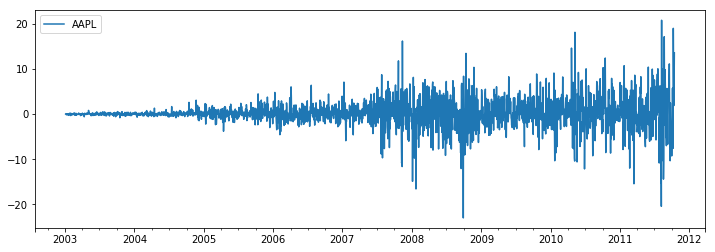

In [9]:
AAPL.plot()
plt.show()

In [ ]:
# 自相关图
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(AAPL).show()

In [ ]:
#定阶
pmax = int(len(AAPL)/10) #一般阶数不超过length/10
qmax = int(len(AAPL)/10) #一般阶数不超过length/10

from statsmodels.tsa.arima_model import ARIMA

bic_matrix = [] #bic矩阵
for p in range(pmax+1):
  tmp = []
  for q in range(qmax+1):
    try: #存在部分报错，所以用try来跳过报错。
      tmp.append(ARIMA(AAPL, (p,1,q)).fit().bic)
    except:
      tmp.append(None)
  bic_matrix.append(tmp)

bic_matrix = pd.DataFrame(bic_matrix) #从中可以找出最小值

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
p,q = bic_matrix.stack().idxmin() #先用stack展平，然后用idxmin找出最小值位置。
print(u'BIC最小的p值和q值为：%s、%s' %(p,q)) 
model = ARIMA(AAPL, (0,1,1)).fit() #建立ARIMA(0, 1, 1)模型
model.summary() #给出一份模型报告
model.forecast(5) #作为期5天的预测，返回预测结果、标准误差、置信区间。

In [ ]:
# bic_matrix = pd.DataFrame(bic_matrix) #从中可以找出最小值

# p,q = bic_matrix.stack().idxmin() #先用stack展平，然后用idxmin找出最小值位置。
# print(u'BIC最小的p值和q值为：%s、%s' %(p,q)) 
# model = ARIMA(close_px, (0,1,1)).fit() #建立ARIMA(0, 1, 1)模型
# model.summary() #给出一份模型报告
# model.forecast(5) #作为期5天的预测，返回预测结果、标准误差、置信区间。